In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [42]:
data = pd.read_csv('OS_input.txt', sep="\t")
data

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool
0,BIDs1_001,chr1,18396190,18396356,166,5322,.,BID,1
1,NSCLC1_001,chr1,114708477,114708596,119,2754,NRAS,exon-5,1
2,NSCLC2_001,chr1,114708585,114708698,113,2212,NRAS,exon-5,1
3,NSCLC1_002,chr1,114709527,114709647,120,1716,NRAS,exon-4,1
4,NSCLCv041_001,chr1,114709631,114709747,116,708,NRAS,exon-4,1
...,...,...,...,...,...,...,...,...,...
176,NSCLC2_072,chr7,140781562,140781647,85,1226,BRAF,exon-11,1
177,NSCLC1_073,chr7,140781647,140781772,125,2956,BRAF,exon-11,1
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1
179,BIDs2_006,chrY,13396806,13396922,116,18,.,BID,1


Пропущенных значений в *total reads* нет

In [43]:
data["total_reads"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 181 entries, 0 to 180
Series name: total_reads
Non-Null Count  Dtype
--------------  -----
181 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


Считаем общее число ридов и переводим абсолютное число для каждого ампликона в относительное (*amp_proc*):

In [44]:
total_amp_number = data["total_reads"].sum()
total_amp_number

411578

In [45]:
data["amp_proc"] = data["total_reads"] / total_amp_number

In [46]:
data_sorted = data.sort_values(by=['amp_proc'])
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1,0.000000
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1,0.000000
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1,0.000000
150,NSCLC2_063,chr7,55192743,55192867,124,0,EGFR,exon-22,1,0.000000
151,NSCLCr0_046,chr7,55192776,55192867,91,0,EGFR,exon-22,1,0.000000
...,...,...,...,...,...,...,...,...,...,...
59,BIDs2_002,chr19,22546689,22546855,166,7866,.,BID,1,0.019112
157,NSCLCv041_015,chr7,55201249,55201338,89,8100,EGFR,exon-25,1,0.019680
135,NSCLCv041_013,chr7,55165268,55165383,115,10024,EGFR,exon-15,1,0.024355
148,NSCLCv041_014,chr7,55191781,55191898,117,11330,EGFR,exon-21,1,0.027528


Сортируем по возрастанию *amp_proc*

In [47]:
data_sorted['amp_serial_num'] = np.arange(data.shape[0])

In [48]:
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc,amp_serial_num
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1,0.000000,0
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1,0.000000,1
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1,0.000000,2
150,NSCLC2_063,chr7,55192743,55192867,124,0,EGFR,exon-22,1,0.000000,3
151,NSCLCr0_046,chr7,55192776,55192867,91,0,EGFR,exon-22,1,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
59,BIDs2_002,chr19,22546689,22546855,166,7866,.,BID,1,0.019112,176
157,NSCLCv041_015,chr7,55201249,55201338,89,8100,EGFR,exon-25,1,0.019680,177
135,NSCLCv041_013,chr7,55165268,55165383,115,10024,EGFR,exon-15,1,0.024355,178
148,NSCLCv041_014,chr7,55191781,55191898,117,11330,EGFR,exon-21,1,0.027528,179


In [49]:
X = np.array(data_sorted['amp_serial_num']).reshape(-1,1)
y = np.array(data_sorted['amp_proc']).reshape(-1,1)

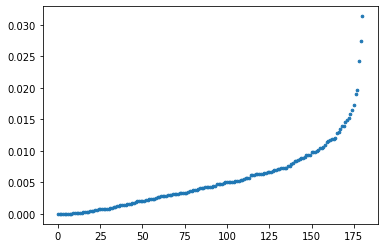

In [50]:
plt.scatter(X, y, s = 7)

Рассчитаем ожидаемое покрытие для каждого ампликона и значение R2. Если R2 меньше 0,85, дальше не идем

In [51]:
lin_reg = LinearRegression()

In [52]:
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
r2 = r2_score(y, y_pred)
r2

0.782469622495333

In [53]:
# if r2 < 0.85:
#     sys.exit()

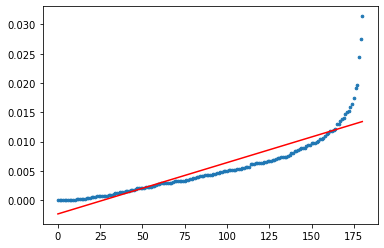

In [54]:
plt.scatter(X, y, s = 7)
plt.plot(X, y_pred, color = "red");

In [55]:
data_sorted["amp_proc_predict"] = y_pred
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc,amp_serial_num,amp_proc_predict
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1,0.000000,0,-0.002359
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1,0.000000,1,-0.002271
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1,0.000000,2,-0.002183
150,NSCLC2_063,chr7,55192743,55192867,124,0,EGFR,exon-22,1,0.000000,3,-0.002096
151,NSCLCr0_046,chr7,55192776,55192867,91,0,EGFR,exon-22,1,0.000000,4,-0.002008
...,...,...,...,...,...,...,...,...,...,...,...,...
59,BIDs2_002,chr19,22546689,22546855,166,7866,.,BID,1,0.019112,176,0.013058
157,NSCLCv041_015,chr7,55201249,55201338,89,8100,EGFR,exon-25,1,0.019680,177,0.013146
135,NSCLCv041_013,chr7,55165268,55165383,115,10024,EGFR,exon-15,1,0.024355,178,0.013233
148,NSCLCv041_014,chr7,55191781,55191898,117,11330,EGFR,exon-21,1,0.027528,179,0.013321


Найдем отношение реального и ожидаемого покрытия для каждого ампликона

In [56]:
data_sorted["ratio"] = abs(data_sorted["amp_proc"] / data_sorted["amp_proc_predict"])
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc,amp_serial_num,amp_proc_predict,ratio
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1,0.000000,0,-0.002359,0.000000
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1,0.000000,1,-0.002271,0.000000
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1,0.000000,2,-0.002183,0.000000
150,NSCLC2_063,chr7,55192743,55192867,124,0,EGFR,exon-22,1,0.000000,3,-0.002096,0.000000
151,NSCLCr0_046,chr7,55192776,55192867,91,0,EGFR,exon-22,1,0.000000,4,-0.002008,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,BIDs2_002,chr19,22546689,22546855,166,7866,.,BID,1,0.019112,176,0.013058,1.463612
157,NSCLCv041_015,chr7,55201249,55201338,89,8100,EGFR,exon-25,1,0.019680,177,0.013146,1.497109
135,NSCLCv041_013,chr7,55165268,55165383,115,10024,EGFR,exon-15,1,0.024355,178,0.013233,1.840455
148,NSCLCv041_014,chr7,55191781,55191898,117,11330,EGFR,exon-21,1,0.027528,179,0.013321,2.066564


In [57]:
data_OS_output_undercovered = data_sorted.loc[data_sorted["ratio"] < 0.5]
data_OS_output_undercovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc,amp_serial_num,amp_proc_predict,ratio
178,BIDs1_006,chrY,3019757,3019872,115,0,.,BID,1,0.000000,0,-0.002359,0.000000
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1,0.000000,1,-0.002271,0.000000
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1,0.000000,2,-0.002183,0.000000
150,NSCLC2_063,chr7,55192743,55192867,124,0,EGFR,exon-22,1,0.000000,3,-0.002096,0.000000
151,NSCLCr0_046,chr7,55192776,55192867,91,0,EGFR,exon-22,1,0.000000,4,-0.002008,0.000000
180,BIDs2_007,chrY,19555241,19555355,114,8,.,BID,1,0.000019,5,-0.001921,0.010120
96,NSCLC2_041,chr6,117318184,117318289,105,8,ROS1,exon-37,1,0.000019,6,-0.001833,0.010604
179,BIDs2_006,chrY,13396806,13396922,116,18,.,BID,1,0.000044,7,-0.001745,0.025056
118,NSCLCr0_028,chr7,55156590,55156699,109,26,EGFR,exon-9,1,0.000063,8,-0.001658,0.038104
134,NSCLC2_057,chr7,55163761,55163883,122,28,EGFR,exon-14,1,0.000068,9,-0.001570,0.043324


In [58]:
data_OS_output_overcovered = data_sorted.loc[data_sorted["ratio"] > 1.3]
data_OS_output_overcovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool,amp_proc,amp_serial_num,amp_proc_predict,ratio
31,NSCLC2_012,chr17,7673620,7673740,120,232,TP53,exon-8,1,0.000564,22,-0.000432,1.306174
50,NSCLC2_022,chr17,39723593,39723724,131,260,ERBB2,exon-18,1,0.000632,23,-0.000344,1.836598
22,NSCLC2_009,chr12,25245320,25245432,112,298,KRAS,exon-2,1,0.000724,24,-0.000256,2.824266
103,NSCLC2_045,chr7,55143440,55143561,121,300,EGFR,exon-3,1,0.000729,25,-0.000169,4.318893
65,NSCLC1_029,chr2,29214025,29214153,128,304,ALK,exon-24,1,0.000739,26,-0.000081,9.098979
169,NSCLCr0_051,chr7,116783294,116783387,93,306,MET,exon-19,1,0.000743,27,0.000006,115.840466
21,NSCLCr0_006,chr12,25245308,25245411,103,314,KRAS,exon-2,1,0.000763,28,0.000094,8.115065
55,NSCLC1_025,chr17,39724897,39725012,115,318,ERBB2,exon-20,1,0.000773,29,0.000182,4.254444
139,NSCLC1_060,chr7,55173070,55173195,125,342,EGFR,exon-17,1,0.000831,30,0.000269,3.086718
39,NSCLC1_017,chr17,7675228,7675350,122,362,TP53,exon-5,1,0.000880,31,0.000357,2.465114


In [59]:
X_und = np.array(data_OS_output_undercovered['amp_serial_num']).reshape(-1,1)
y_und = np.array(data_OS_output_undercovered['amp_proc']).reshape(-1,1)
X_over = np.array(data_OS_output_overcovered['amp_serial_num']).reshape(-1,1)
y_over = np.array(data_OS_output_overcovered['amp_proc']).reshape(-1,1)

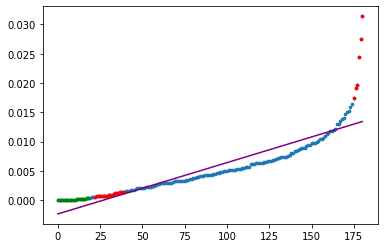

In [60]:
plt.scatter(X, y, s = 7)
plt.plot(X, y_pred, color = "purple")
plt.scatter(X_und, y_und, color = "green", s = 7)
plt.scatter(X_over, y_over, color = "red", s = 7)

Удалим добавленные колонки

In [61]:
data_OS_output_undercovered = data_OS_output_undercovered.drop(["amp_proc", "amp_serial_num", "amp_proc_predict", "ratio"],  axis=1)
data_OS_output_undercovered = data_OS_output_undercovered.sort_index()
data_OS_output_undercovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool
14,NSCLC2_006,chr12,25225586,25225685,99,66,KRAS,exon-4,1
28,NSCLC2_011,chr17,7670615,7670760,145,92,TP53,exon-10,1
45,NSCLC2_020,chr17,39719731,39719858,127,0,ERBB2,exon-16,1
46,NSCLCr0_013,chr17,39719763,39719858,95,0,ERBB2,exon-16,1
96,NSCLC2_041,chr6,117318184,117318289,105,8,ROS1,exon-37,1
97,NSCLCv041_010,chr7,55019247,55019366,119,106,EGFR,exon-1,1
115,NSCLC2_051,chr7,55156452,55156564,112,50,EGFR,exon-9,1
117,NSCLC1_052,chr7,55156559,55156659,100,130,EGFR,exon-9,1
118,NSCLCr0_028,chr7,55156590,55156699,109,26,EGFR,exon-9,1
119,NSCLC2_052,chr7,55156656,55156784,128,146,EGFR,exon-10-exon-9,1


In [62]:
data_OS_output_overcovered = data_OS_output_overcovered .drop(["amp_proc", "amp_serial_num", "amp_proc_predict", "ratio"],  axis=1)
data_OS_output_overcovered = data_OS_output_overcovered.sort_index()
data_OS_output_overcovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,gene,region,pool
5,NSCLC1_003,chr1,114713743,114713866,123,556,NRAS,exon-3,1
21,NSCLCr0_006,chr12,25245308,25245411,103,314,KRAS,exon-2,1
22,NSCLC2_009,chr12,25245320,25245432,112,298,KRAS,exon-2,1
31,NSCLC2_012,chr17,7673620,7673740,120,232,TP53,exon-8,1
33,NSCLC2_013,chr17,7674075,7674201,126,372,TP53,exon-7,1
39,NSCLC1_017,chr17,7675228,7675350,122,362,TP53,exon-5,1
44,NSCLCv041_006,chr17,7676509,7676620,111,12920,TP53,exon-2,1
50,NSCLC2_022,chr17,39723593,39723724,131,260,ERBB2,exon-18,1
52,NSCLC2_023,chr17,39723907,39724032,125,7150,ERBB2,exon-19,1
55,NSCLC1_025,chr17,39724897,39725012,115,318,ERBB2,exon-20,1


In [63]:
data_OS_output_undercovered.to_csv("OS_output_undercovered.txt", sep="\t", index=False)
data_OS_output_overcovered.to_csv("OS_output_overcovered.txt", sep="\t", index=False)